# Import Libraries

In [1]:
# Load the rasa_nlu package
from rasa_nlu.training_data  import load_data
from rasa_nlu.config import RasaNLUModelConfig
from rasa_nlu.model import Trainer
from rasa_nlu import config

#spacy for NLP
import spacy
nlp = spacy.load("en_core_web_sm")

import pandas as pd
import seaborn as sns


In [2]:
DATA_PATH = '<update path for data>'

# Load Data

In [3]:
#CSV to JSON
train_df = pd.read_csv(DATA_PATH+'train_preprocessed.csv')
train_df["text"] = train_df['text'].str.replace('[^\w\s]','')

#train_df.to_json(path_or_buf='training_data.json',orient='records',lines=True)
test_df = pd.read_csv(DATA_PATH+'test.csv')


# Preprocessing

In [4]:
train_df.head()

,text,intent
0,what expression would i use to say i love you ...,translate
1,can you tell me how to say i do not speak much...,translate
2,what is the equivalent of life is good in french,translate
3,tell me how to say it is a beautiful morning i...,translate
4,if i were mongolian how would i say that i am ...,translate


In [5]:
# Shape of dataset
print("shape of training dataset: ",train_df.shape)
print("shape of testing dataset: ",test_df.shape)

shape of training dataset:  (15000, 2)
shape of testing dataset:  (4500, 1)


In [6]:
# Overview of data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    15000 non-null  object
 1   intent  15000 non-null  object
dtypes: object(2)
memory usage: 234.5+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4500 non-null   object
dtypes: object(1)
memory usage: 35.3+ KB


In [8]:
print("Total number of itents {}".format(len(train_df[['intent']].intent.unique())))
print(train_df[['intent']].intent.unique())

Total number of itents 150
['translate' 'transfer' 'timer' 'definition' 'meaning_of_life'
 'insurance_change' 'find_phone' 'travel_alert' 'pto_request'
 'improve_credit_score' 'fun_fact' 'change_language' 'payday'
 'replacement_card_duration' 'time' 'application_status' 'flight_status'
 'flip_coin' 'change_user_name' 'where_are_you_from'
 'shopping_list_update' 'what_can_i_ask_you' 'maybe' 'oil_change_how'
 'restaurant_reservation' 'balance' 'confirm_reservation' 'freeze_account'
 'rollover_401k' 'who_made_you' 'distance' 'user_name' 'timezone'
 'next_song' 'transactions' 'restaurant_suggestion' 'rewards_balance'
 'pay_bill' 'spending_history' 'pto_request_status' 'credit_score'
 'new_card' 'lost_luggage' 'repeat' 'mpg' 'oil_change_when' 'yes'
 'travel_suggestion' 'insurance' 'todo_list_update' 'reminder'
 'change_speed' 'tire_pressure' 'no' 'apr' 'nutrition_info' 'calendar'
 'uber' 'calculator' 'date' 'carry_on' 'pto_used' 'schedule_maintenance'
 'travel_notification' 'sync_device' 't

In [9]:
train_df.intent.value_counts()

date                    100
reminder                100
uber                    100
pto_balance             100
improve_credit_score    100
                       ... 
card_declined           100
jump_start              100
income                  100
sync_device             100
bill_due                100
Name: intent, Length: 150, dtype: int64

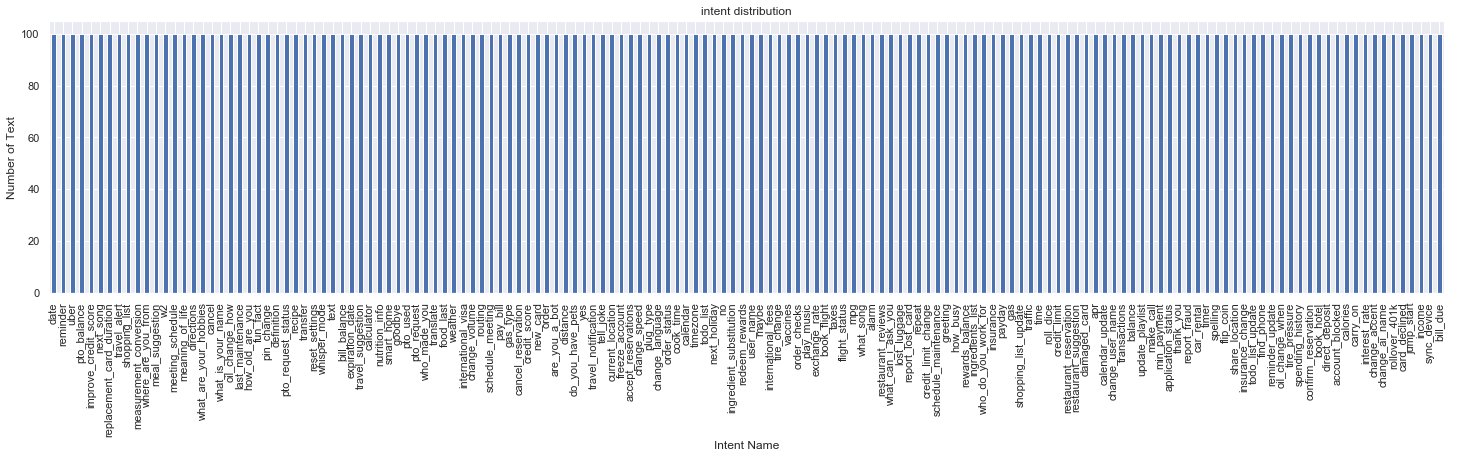

In [10]:
#Plot histogram is a representation of the distribution of dataset.
sns.set(rc={'figure.figsize':(25,5)})
train_df.intent.value_counts().plot(kind='bar',title='intent distribution', xlabel='Intent Name',ylabel='Number of Text')

In [11]:
# Loading DataSet
train_data = load_data('training_data.json')

In [12]:
# Config Backend using Sklearn and Spacy
trainer = Trainer(config.load("metadata.json"))

In [13]:
# Training Data
trainer.train(train_data)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 55.6min finished


In [14]:
# Returns the directory the model is stored in (Creat a folder to store model in)
model_directory = trainer.persist(DATA_PATH+'/RASA_intent_classification/')

In [15]:
# Making Predictions With Model
from rasa_nlu.model import Metadata, Interpreter
interpreter = Interpreter.load(model_directory)

In [16]:
# Prediction of Intent
predictions = interpreter.parse(u"expression would use say love italian")

In [17]:
predictions['text']

'expression would use say love italian'

In [18]:
predictions

{'intent': {'name': 'make_call', 'confidence': 0.18687012093121083},
 'entities': [],
 'intent_ranking': [{'name': 'make_call', 'confidence': 0.18687012093121083},
  {'name': 'definition', 'confidence': 0.057762434093901964},
  {'name': 'uber', 'confidence': 0.0360975098481127},
  {'name': 'whisper_mode', 'confidence': 0.03461711487507421},
  {'name': 'cancel', 'confidence': 0.03434772484245957},
  {'name': 'play_music', 'confidence': 0.028433749527375783},
  {'name': 'change_accent', 'confidence': 0.0282393048251292},
  {'name': 'translate', 'confidence': 0.021401091328006223},
  {'name': 'meal_suggestion', 'confidence': 0.018951610814743277},
  {'name': 'recipe', 'confidence': 0.01763294737225446}],
 'text': 'expression would use say love italian'}

In [19]:
predictions['intent']['name'],predictions['intent']['confidence']

('make_call', 0.18687012093121083)

In [20]:
prediction_df = pd.DataFrame(columns=['text','predicted_intent','probability'])

for index,row in test_df.iterrows():
    res = interpreter.parse(row.text)
    print(row.text,res['intent']['name'])
    prediction_df = prediction_df.append(pd.DataFrame([[row['text'],res['intent']['name'],res['intent']['confidence']]], columns=prediction_df.columns))


"i"m headed out to lax and going to phl for a low price of $120 this weekend on the 12th? pto_request
"i'll be travelling from lax and headed to phl for 120 on the 10th of may? schedule_meeting
"i'll leave to lax and go to phl for $120 on nov 5th? pto_request
"i'm fly out from lax to phl this weekend for around $120? pto_request
"i'm going on a flight from lax and going to phl, which is only $120 on june 15th? pto_request
"what's the method to improve credit score? improve_credit_score
"when the credit score improve? expiration_date
"where is improve the credit score? improve_credit_score
"which could be improve the credit score? maybe
"which is the best way to improve the credit score? improve_credit_score
"which things are wanted to remember? who_made_you
10-4? calculator
20 yen equals how many dollars? measurement_conversion
20 yen is how many dollars? measurement_conversion
350 set the oven? goodbye
5 people are going to be at tropicana by 8pm, reserve the table under martins name 

In [21]:
prediction_df.to_csv(DATA_PATH+'predicted_results.csv',index=False)